<a href="https://colab.research.google.com/github/dj251/MSF/blob/main/Legacy_portfolio_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import cvxpy as cp
from itertools import product

In [6]:
tickers = ['NTSX','DFSV','DFAX','BITB','GLD','QQQ','SPAB','DFSD']

In [7]:
data = pd.read_excel("Final Portfiolio - 39 months.xlsx", sheet_name = "Sheet1", index_col=0)
#data.dropna(inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Final Portfiolio - 39 months.xlsx'

In [ ]:
data

,NTSX,DFSV,DFAX,BITB,GLD,QQQ,SPAB,DFSD,rf,Unnamed: 10,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-01,0.009970,0.006848,-0.004787,0.147524,0.012726,0.045386,-0.030356,-0.021055,0.003658,NaN,...,NaN,NaN,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8
2022-04-01,-0.101431,-0.059953,-0.060922,0.042249,-0.020703,-0.135957,-0.039583,-0.014199,0.003658,NaN,...,NaN,Column 1,0.002695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,-0.004944,0.042097,0.016219,-0.169255,-0.032615,-0.015866,0.005245,0.006355,0.003658,NaN,...,NaN,Column 2,0.002777,0.00484,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,-0.079768,-0.106535,-0.099538,-0.225228,-0.015660,-0.090827,-0.017890,-0.013260,0.003658,NaN,...,NaN,Column 3,0.002037,0.002344,0.002243,NaN,NaN,NaN,NaN,NaN
2022-07-01,0.094781,0.100621,0.033582,-0.353561,-0.025882,0.125517,0.023909,0.013439,0.003658,NaN,...,NaN,Column 4,0.000079,0.000058,0.000203,0.02964,NaN,NaN,NaN,NaN
2022-08-01,-0.052603,-0.026178,-0.040162,0.208084,-0.029433,-0.051322,-0.031875,-0.018101,0.003658,NaN,...,NaN,Column 5,0.000417,-0.000024,0.000849,0.000146,0.0016,NaN,NaN,NaN
2022-09-01,-0.115674,-0.098842,-0.111895,-0.135150,-0.028882,-0.106960,-0.044793,-0.013934,0.003658,NaN,...,NaN,Column 6,0.002949,0.002717,0.002009,0.000069,0.00025,0.003803,NaN,NaN
2022-10-01,0.066710,0.149610,0.040762,-0.040455,-0.017844,0.039999,-0.014028,-0.006957,0.003658,NaN,...,NaN,Column 7,0.000873,0.000767,0.000802,0.000018,0.000384,0.000827,0.000468,NaN
2022-11-01,0.061925,0.052295,0.129705,0.060667,0.084919,0.055442,0.034146,0.012040,0.003658,NaN,...,NaN,Column 8,0.000292,0.000267,0.000286,0.000021,0.000126,0.000276,0.00016,0.000068


In [ ]:
data

,NTSX,DFSV,DFAX,BITB,GLD,QQQ,SPAB,DFSD,rf,Unnamed: 10,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-01,0.009970,0.006848,-0.004787,0.147524,0.012726,0.045386,-0.030356,-0.021055,0.003658,NaN,...,NaN,NaN,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8
2022-04-01,-0.101431,-0.059953,-0.060922,0.042249,-0.020703,-0.135957,-0.039583,-0.014199,0.003658,NaN,...,NaN,Column 1,0.002695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,-0.004944,0.042097,0.016219,-0.169255,-0.032615,-0.015866,0.005245,0.006355,0.003658,NaN,...,NaN,Column 2,0.002777,0.00484,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,-0.079768,-0.106535,-0.099538,-0.225228,-0.015660,-0.090827,-0.017890,-0.013260,0.003658,NaN,...,NaN,Column 3,0.002037,0.002344,0.002243,NaN,NaN,NaN,NaN,NaN
2022-07-01,0.094781,0.100621,0.033582,-0.353561,-0.025882,0.125517,0.023909,0.013439,0.003658,NaN,...,NaN,Column 4,0.000079,0.000058,0.000203,0.02964,NaN,NaN,NaN,NaN
2022-08-01,-0.052603,-0.026178,-0.040162,0.208084,-0.029433,-0.051322,-0.031875,-0.018101,0.003658,NaN,...,NaN,Column 5,0.000417,-0.000024,0.000849,0.000146,0.0016,NaN,NaN,NaN
2022-09-01,-0.115674,-0.098842,-0.111895,-0.135150,-0.028882,-0.106960,-0.044793,-0.013934,0.003658,NaN,...,NaN,Column 6,0.002949,0.002717,0.002009,0.000069,0.00025,0.003803,NaN,NaN
2022-10-01,0.066710,0.149610,0.040762,-0.040455,-0.017844,0.039999,-0.014028,-0.006957,0.003658,NaN,...,NaN,Column 7,0.000873,0.000767,0.000802,0.000018,0.000384,0.000827,0.000468,NaN
2022-11-01,0.061925,0.052295,0.129705,0.060667,0.084919,0.055442,0.034146,0.012040,0.003658,NaN,...,NaN,Column 8,0.000292,0.000267,0.000286,0.000021,0.000126,0.000276,0.00016,0.000068


In [ ]:
data.isnull().sum()

,0
NTSX,0
DFSV,0
DFAX,0
BITB,0
GLD,0
QQQ,0
SPAB,0
DFSD,0
rf,0
Unnamed: 10,39


In [ ]:
selected_columns = data[['NTSX', 'DFSV', 'DFAX', 'BITB', 'GLD', 'QQQ', 'SPAB', 'DFSD']]
display(selected_columns.head())

,NTSX,DFSV,DFAX,BITB,GLD,QQQ,SPAB,DFSD
Date,,,,,,,,
2022-03-01,0.009970,0.006848,-0.004787,0.147524,0.012726,0.045386,-0.030356,-0.021055
2022-04-01,-0.101431,-0.059953,-0.060922,0.042249,-0.020703,-0.135957,-0.039583,-0.014199
2022-05-01,-0.004944,0.042097,0.016219,-0.169255,-0.032615,-0.015866,0.005245,0.006355
2022-06-01,-0.079768,-0.106535,-0.099538,-0.225228,-0.015660,-0.090827,-0.017890,-0.013260
2022-07-01,0.094781,0.100621,0.033582,-0.353561,-0.025882,0.125517,0.023909,0.013439


In [ ]:
# Define the weights for each asset
weights = {
    'NTSX': 0.20,
    'DFSV': 0.10,
    'DFAX': 0.20,
    'BITB': 0.10,
    'GLD': 0.10,
    'QQQ': 0.10,
    'SPAB': 0.10,
    'DFSD': 0.10
}

# Compute the portfolio returns
portfolio_returns = selected_columns.dot(pd.Series(weights))
# Compute cumulative returns
#cumulative_returns = (1 + portfolio_returns).cumprod()

# Combine into a single DataFrame for display
portfolio_summary = pd.DataFrame({
    'Monthly Return': portfolio_returns})

#tools.display_dataframe_to_user(name="Portfolio Returns (From Excel)", dataframe=portfolio_summary)


In [ ]:
portfolio_summary

,Monthly Return
Date,
2022-03-01,0.017144
2022-04-01,-0.055285
2022-05-01,-0.014149
2022-06-01,-0.082801
2022-07-01,0.014077
2022-08-01,-0.013436
2022-09-01,-0.088370
2022-10-01,0.032527
2022-11-01,0.068277


In [ ]:
# Define the weights for each asset
weights = {
    'NTSX': 0.20,
    'DFSV': 0.10,
    'DFAX': 0.20,
    'BITB': 0.10,
    'GLD': 0.10,
    'QQQ': 0.10,
    'SPAB': 0.10,
    'DFSD': 0.10
}

# Compute the portfolio returns
portfolio_returns = selected_columns.dot(pd.Series(weights))
# Compute cumulative returns
#cumulative_returns = (1 + portfolio_returns).cumprod()

# Combine into a single DataFrame for display
portfolio_summary = pd.DataFrame({
    'Monthly Return': portfolio_returns})

#tools.display_dataframe_to_user(name="Portfolio Returns (From Excel)", dataframe=portfolio_summary)
mean_returns =  portfolio_summary['Monthly Return'].mean()*12
print("Mean Returns:", mean_returns)
std_dev_with_bonds = portfolio_summary['Monthly Return'].std()
print("Standard Deviation with Bonds:", std_dev_with_bonds*(12**0.5))

Mean Returns: 0.10246520349165306
Standard Deviation with Bonds: 0.13515066698196365


In [ ]:
#without GLD but with bonds
# Define the weights for each asset
weights = {
    'NTSX': 0.22,
    'DFSV': 0.11,
    'DFAX': 0.22,
    'BITB': 0.11,
    'GLD': 0,
    'QQQ': 0.11,
    'SPAB': 0.11,
    'DFSD': 0.11
}

# Compute the portfolio returns
portfolio_returns = selected_columns.dot(pd.Series(weights))
# Compute cumulative returns
#cumulative_returns = (1 + portfolio_returns).cumprod()

# Combine into a single DataFrame for display
portfolio_summary = pd.DataFrame({
    'Monthly Return': portfolio_returns})

#tools.display_dataframe_to_user(name="Portfolio Returns (From Excel)", dataframe=portfolio_summary)
std_dev_without_gold = portfolio_summary['Monthly Return'].std()
mean_returns =  portfolio_summary['Monthly Return'].mean()*12
print("Mean Returns:", mean_returns)
print("Standard Deviation without Gold:", std_dev_without_gold*(12**0.5))

Mean Returns: 0.09421394576852954
Standard Deviation without Gold: 0.14446050662111884


In [ ]:
#without Bitcoin
# Define the weights for each asset
weights = {
    'NTSX': 0.22,
    'DFSV': 0.11,
    'DFAX': 0.22,
    'BITB': 0,
    'GLD': 0.11,
    'QQQ': 0.11,
    'SPAB': 0.11,
    'DFSD': 0.11
}

# Compute the portfolio returns
portfolio_returns = selected_columns.dot(pd.Series(weights))
# Compute cumulative returns
#cumulative_returns = (1 + portfolio_returns).cumprod()

# Combine into a single DataFrame for display
portfolio_summary = pd.DataFrame({
    'Monthly Return': portfolio_returns})

#tools.display_dataframe_to_user(name="Portfolio Returns (From Excel)", dataframe=portfolio_summary)
std_dev_without_btc = portfolio_summary['Monthly Return'].std()
mean_returns =  portfolio_summary['Monthly Return'].mean()*12
print("Mean Returns:", mean_returns)
print("Standard Deviation without Bitcoin:", std_dev_without_btc*(12**0.5))

Mean Returns: 0.0626956784317374
Standard Deviation without Bitcoin: 0.12960330409761406


In [ ]:
#without Bonds
# Define the weights for each asset
weights = {
    'NTSX': 0.24,
    'DFSV': 0.13,
    'DFAX': 0.24,
    'BITB': 0.13,
    'GLD': 0.13,
    'QQQ': 0.13,
    'SPAB': 0,
    'DFSD': 0
}

# Compute the portfolio returns
portfolio_returns = selected_columns.dot(pd.Series(weights))
# Compute cumulative returns
#cumulative_returns = (1 + portfolio_returns).cumprod()

# Combine into a single DataFrame for display
portfolio_summary = pd.DataFrame({
    'Monthly Return': portfolio_returns})

#tools.display_dataframe_to_user(name="Portfolio Returns (From Excel)", dataframe=portfolio_summary)
std_dev_without_bonds = portfolio_summary['Monthly Return'].std()
mean_returns =  portfolio_summary['Monthly Return'].mean()*12
print("Mean Returns:", mean_returns)
print("Standard Deviation without Bonds:", std_dev_without_bonds*(12**0.5))

Mean Returns: 0.1367027888008303
Standard Deviation without Bonds: 0.16140364155002734


In [ ]:
#without QQQ
# Define the weights for each asset
weights = {
    'NTSX': 0.22,
    'DFSV': 0.11,
    'DFAX': 0.22,
    'BITB': 0.11,
    'GLD': 0.11,
    'QQQ': 0,
    'SPAB': 0.11,
    'DFSD': 0.11
}

# Compute the portfolio returns
portfolio_returns = selected_columns.dot(pd.Series(weights))
# Compute cumulative returns
#cumulative_returns = (1 + portfolio_returns).cumprod()

# Combine into a single DataFrame for display
portfolio_summary = pd.DataFrame({
    'Monthly Return': portfolio_returns})

#tools.display_dataframe_to_user(name="Portfolio Returns (From Excel)", dataframe=portfolio_summary)
std_dev_without_qqq = portfolio_summary['Monthly Return'].std()
mean_returns =  portfolio_summary['Monthly Return'].mean()*12
print("Mean Returns:", mean_returns)
print("Standard Deviation without QQQ:", std_dev_without_qqq*(12**0.5))

Mean Returns: 0.09644974223108327
Standard Deviation without QQQ: 0.13032313906862528


In [ ]:
std_dev=selected_columns.std()
std_dev

,0
NTSX,0.052587
DFSV,0.070478
DFAX,0.047977
BITB,0.174415
GLD,0.040528
QQQ,0.062478
SPAB,0.021919
DFSD,0.008332


In [ ]:
#without GLD, BTC, BONDS
# Define the weights for each asset
weights = {
    'NTSX': 0.3333,
    'DFSV': 0.1666,
    'DFAX': 0.3333,
    'BITB': 0,
    'GLD': 0,
    'QQQ': 0.1666,
    'SPAB': 0,
    'DFSD': 0
}

# Compute the portfolio returns
portfolio_returns = selected_columns.dot(pd.Series(weights))
# Compute cumulative returns
#cumulative_returns = (1 + portfolio_returns).cumprod()

# Combine into a single DataFrame for display
portfolio_summary = pd.DataFrame({
    'Monthly Return': portfolio_returns})

#tools.display_dataframe_to_user(name="Portfolio Returns (From Excel)", dataframe=portfolio_summary)
std_dev_without_gbb = portfolio_summary['Monthly Return'].std()
mean_returns =  portfolio_summary['Monthly Return'].mean()*12
print("Mean Returns:", mean_returns)
print("Standard Deviation without Gold Bitcoin and Bonds:", std_dev_without_gbb*(12**0.5))

Mean Returns: 0.07439837770386927
Standard Deviation without Gold Bitcoin and Bonds: 0.17585762243834446


In [ ]:
#without DFSV
# Define the weights for each asset
weights = {
    'NTSX': 0.222,
    'DFSV': 0,
    'DFAX': 0.222,
    'BITB': 0.111,
    'GLD': 0.111,
    'QQQ': 0.111,
    'SPAB': 0.111,
    'DFSD': 0.111
}

# Compute the portfolio returns
portfolio_returns = selected_columns.dot(pd.Series(weights))
# Compute cumulative returns
#cumulative_returns = (1 + portfolio_returns).cumprod()

# Combine into a single DataFrame for display
portfolio_summary = pd.DataFrame({
    'Monthly Return': portfolio_returns})

#tools.display_dataframe_to_user(name="Portfolio Returns (From Excel)", dataframe=portfolio_summary)
std_dev_without_DFSV = portfolio_summary['Monthly Return'].std()
mean_returns =  portfolio_summary['Monthly Return'].mean()*12
print("Mean Returns:", mean_returns)
print("Standard Deviation without DFSV:", std_dev_without_DFSV*(12**0.5))

Mean Returns: 0.10625933251974043
Standard Deviation without DFSV: 0.13211087684252668


In [ ]:
selected_columns

,NTSX,DFSV,DFAX,BITB,GLD,QQQ,SPAB,DFSD
Date,,,,,,,,
2022-03-01,0.009970,0.006848,-0.004787,0.147524,0.012726,0.045386,-0.030356,-0.021055
2022-04-01,-0.101431,-0.059953,-0.060922,0.042249,-0.020703,-0.135957,-0.039583,-0.014199
2022-05-01,-0.004944,0.042097,0.016219,-0.169255,-0.032615,-0.015866,0.005245,0.006355
2022-06-01,-0.079768,-0.106535,-0.099538,-0.225228,-0.015660,-0.090827,-0.017890,-0.013260
2022-07-01,0.094781,0.100621,0.033582,-0.353561,-0.025882,0.125517,0.023909,0.013439
2022-08-01,-0.052603,-0.026178,-0.040162,0.208084,-0.029433,-0.051322,-0.031875,-0.018101
2022-09-01,-0.115674,-0.098842,-0.111895,-0.135150,-0.028882,-0.106960,-0.044793,-0.013934
2022-10-01,0.066710,0.149610,0.040762,-0.040455,-0.017844,0.039999,-0.014028,-0.006957
2022-11-01,0.061925,0.052295,0.129705,0.060667,0.084919,0.055442,0.034146,0.012040


In [ ]:
cumulative_returns = (1 + selected_columns).cumprod()
cumulative_returns

,NTSX,DFSV,DFAX,BITB,GLD,QQQ,SPAB,DFSD
Date,,,,,,,,
2022-03-01,1.009970,1.006848,0.995213,1.147524,1.012726,1.045386,0.969644,0.978945
2022-04-01,0.907527,0.946484,0.934583,1.196005,0.991759,0.903258,0.931263,0.965045
2022-05-01,0.903041,0.986328,0.949741,0.993575,0.959412,0.888927,0.936148,0.971177
2022-06-01,0.831007,0.881250,0.855205,0.769794,0.944388,0.808189,0.919400,0.958299
2022-07-01,0.909771,0.969922,0.883925,0.497625,0.919946,0.909631,0.941382,0.971177
2022-08-01,0.861914,0.944531,0.848424,0.601172,0.892869,0.862947,0.911375,0.953598
2022-09-01,0.762213,0.851172,0.753490,0.519924,0.867082,0.770646,0.870551,0.940311
2022-10-01,0.813061,0.978516,0.784204,0.498890,0.851609,0.801471,0.858339,0.933769
2022-11-01,0.863410,1.029687,0.885919,0.529157,0.923926,0.845905,0.887648,0.945012


In [ ]:
selected_columns.tail(0)# - selected_columns.head(0))

,NTSX,DFSV,DFAX,BITB,GLD,QQQ,SPAB,DFSD
Date,,,,,,,,


In [ ]:
selected_columns.head(1)

,NTSX,DFSV,DFAX,BITB,GLD,QQQ,SPAB,DFSD
Date,,,,,,,,
2022-03-01,0.00997,0.006848,-0.004787,0.147524,0.012726,0.045386,-0.030356,-0.021055


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
import cvxpy as cp
from itertools import product

In [ ]:
tickers1 = ['NTSX', 'SPY', 'AGG']
data1 = yf.download(tickers1, start='2018-08-04', end='2025-06-01', interval='1mo')['Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
data1

Ticker,AGG,NTSX,SPY
Date,,,
2018-09-01,87.961098,23.698587,261.018494
2018-10-01,87.376373,22.341259,244.081009
2018-11-01,87.828369,22.673609,248.608444
2018-12-01,89.616188,21.030327,225.402649
2019-01-01,90.829796,22.766243,244.871353
...,...,...,...
2025-01-01,96.149971,48.045506,600.015015
2025-02-01,97.976234,47.895924,592.397949
2025-03-01,97.974365,45.183517,557.712280


In [ ]:
data1['60/40 portfolio'] = 0.6*data1['SPY'] + 0.4*data1["AGG"]

In [ ]:
data1

Ticker,AGG,NTSX,SPY,60/40 portfolio
Date,,,,
2018-09-01,87.961098,23.698587,261.018494,191.795535
2018-10-01,87.376373,22.341259,244.081009,181.399155
2018-11-01,87.828369,22.673609,248.608444,184.296414
2018-12-01,89.616188,21.030327,225.402649,171.088065
2019-01-01,90.829796,22.766243,244.871353,183.254730
...,...,...,...,...
2025-01-01,96.149971,48.045506,600.015015,398.468997
2025-02-01,97.976234,47.895924,592.397949,394.629263
2025-03-01,97.974365,45.183517,557.712280,373.817114


In [ ]:
data_returns = data1.pct_change()

In [ ]:
data_returns.dropna(inplace = True)

In [ ]:
standard_deviations = data_returns.std()*(12**0.5)
standard_deviations

,0
Ticker,
AGG,0.060791
NTSX,0.172938
SPY,0.179330
60/40 portfolio,0.154299


In [ ]:
data_normalized = data1/data1.iloc[0]

In [ ]:
data_normalized = data_normalized.drop(columns = ['AGG','SPY'])

In [ ]:
data_normalized.std()

,0
Ticker,
NTSX,0.310294
60/40 portfolio,0.327735


In [ ]:
data_normalized

Ticker,NTSX,60/40 portfolio
Date,,
2018-09-01,1.000000,1.000000
2018-10-01,0.942725,0.945794
2018-11-01,0.956749,0.960900
2018-12-01,0.887408,0.892034
2019-01-01,0.960658,0.955469
...,...,...
2025-01-01,2.027357,2.077572
2025-02-01,2.021046,2.057552
2025-03-01,1.906591,1.949040


In [ ]:

#std_ntsx = data_normalized['NTSX'].pct_change().std()
#std_6040 = data_normalized['60/40 portfolio'].pct_change().std()

# Step 2: Calculate leverage factor
#leverage_factor = std_ntsx / std_6040

# Step 3: Apply leverage to 60/40 portfolio
#data_normalized['60/40 portfolio (levered)'] = 1 + (data_normalized['60/40 portfolio'].pct_change() * leverage_factor).fillna(0).cumsum()

# Optional: Adjust the scale to start at 1 like the original
#data_normalized['60/40 portfolio (levered)'] *= data_normalized['60/40 portfolio'].iloc[0]


In [ ]:
data_normalized

Ticker,NTSX,60/40 portfolio
Date,,
2018-09-01,1.000000,1.000000
2018-10-01,0.942725,0.945794
2018-11-01,0.956749,0.960900
2018-12-01,0.887408,0.892034
2019-01-01,0.960658,0.955469
...,...,...
2025-01-01,2.027357,2.077572
2025-02-01,2.021046,2.057552
2025-03-01,1.906591,1.949040


In [ ]:
data_normalized.pct_change().std()*(12**0.5)

,0
Ticker,
NTSX,0.172938
60/40 portfolio,0.154299


In [ ]:
returns = (data_normalized.iloc[-1])/data_normalized.iloc[0]
returns = (returns)**(12/77)
returns -= 1

In [ ]:
returns

,0
Ticker,
NTSX,0.114997
60/40 portfolio,0.118176


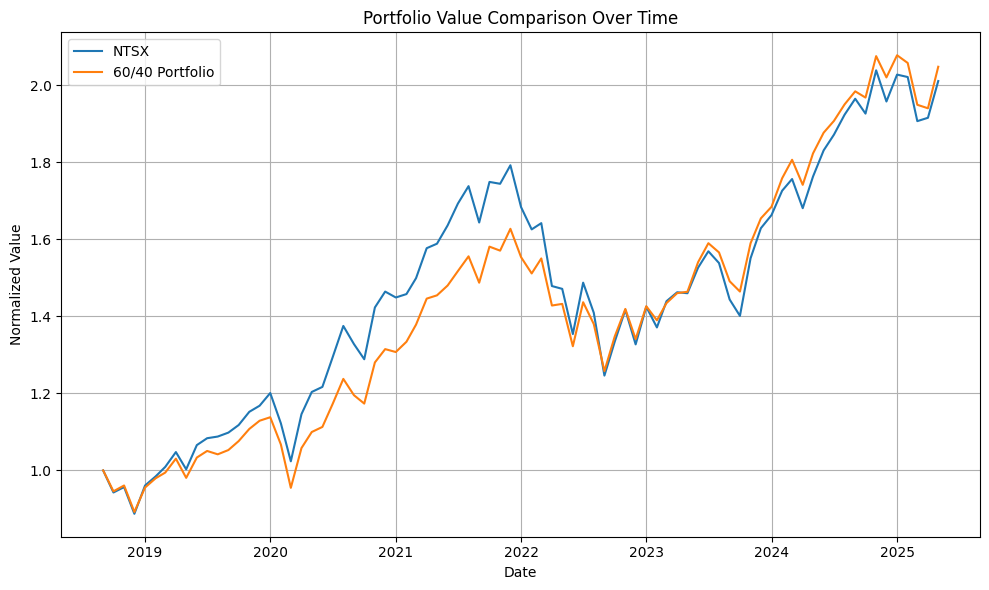

In [ ]:
import matplotlib.pyplot as plt

# Plot the two portfolios
plt.figure(figsize=(10, 6))
plt.plot(data_normalized.index, data_normalized['NTSX'], label='NTSX')
plt.plot(data_normalized.index, data_normalized['60/40 portfolio'], label='60/40 Portfolio')

# Formatting
plt.title('Portfolio Value Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Levered Portfolio calculations

In [ ]:
import pandas as pd

# Step 1: Calculate monthly returns
rets_ntsx = data_normalized['NTSX'].pct_change()
rets_6040 = data_normalized['60/40 portfolio'].pct_change()

# Step 2: Calculate standard deviations
std_ntsx = rets_ntsx.std()
std_6040 = rets_6040.std()

# Step 3: Calculate leverage factor
leverage_factor = std_ntsx / std_6040

# Step 4: Apply leverage to 60/40 returns
levered_returns_6040 = rets_6040 * leverage_factor

# Step 5: Rebuild price series from leveraged returns (starting from 1.0)
levered_prices_6040 = (1 + levered_returns_6040.fillna(0)).cumprod()

# Step 6: Add leveraged series to the original DataFrame
data_normalized['60/40 portfolio (levered)'] = levered_prices_6040


In [ ]:
data_normalized

Ticker,NTSX,60/40 portfolio,60/40 portfolio (levered)
Date,,,
2018-09-01,1.000000,1.000000,1.000000
2018-10-01,0.942725,0.945794,0.939247
2018-11-01,0.956749,0.960900,0.956060
2018-12-01,0.887408,0.892034,0.879263
2019-01-01,0.960658,0.955469,0.949344
...,...,...,...
2025-01-01,2.027357,2.077572,2.245389
2025-02-01,2.021046,2.057552,2.221138
2025-03-01,1.906591,1.949040,2.089849


In [ ]:
data_normalized.pct_change().std()*(12**0.5)

,0
Ticker,
NTSX,0.172938
60/40 portfolio,0.154299
60/40 portfolio (levered),0.172938


In [ ]:
#data_normalized = data_normalized
#data_normalized['60/40 portfolio'] = data_normalized['60/40 portfolio']*(standard_deviations.loc['NTSX']/standard_deviations.loc['60/40 portfolio'])

In [ ]:
#data_normalized

In [ ]:
#data_normalized['60/40 portfolio'] = data_normalized['60/40 portfolio']*(data_normalized['NTSX']/data_normalized['60/40 portfolio'])

In [ ]:
#data_normalized

In [ ]:
data_normalized.std()

,0
Ticker,
NTSX,0.310294
60/40 portfolio,0.327735
60/40 portfolio (levered),0.377353


In [ ]:
data_normalized.pct_change().std()*(12**0.5)

,0
Ticker,
NTSX,0.172938
60/40 portfolio,0.154299
60/40 portfolio (levered),0.172938


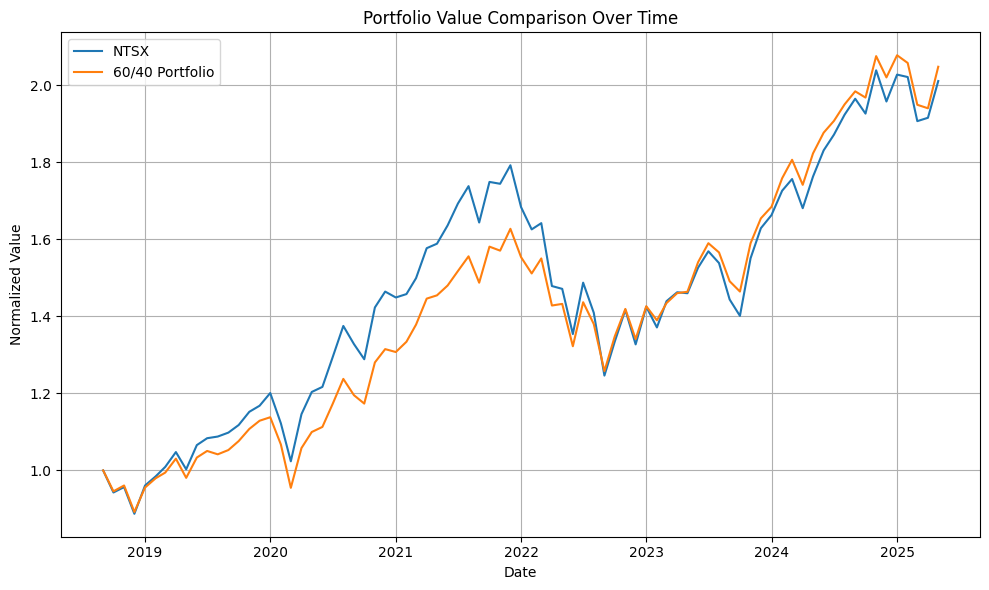

In [ ]:
import matplotlib.pyplot as plt

# Plot the two portfolios
plt.figure(figsize=(10, 6))
plt.plot(data_normalized.index, data_normalized['NTSX'], label='NTSX')
plt.plot(data_normalized.index, data_normalized['60/40 portfolio'], label='60/40 Portfolio')

# Formatting
plt.title('Portfolio Value Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


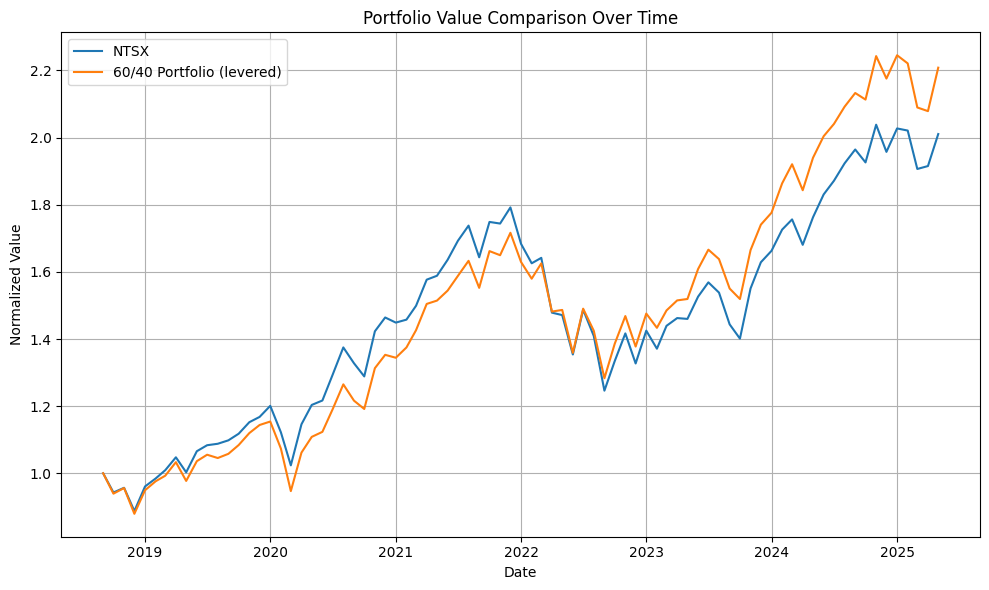

In [ ]:
import matplotlib.pyplot as plt

# Plot the two portfolios
plt.figure(figsize=(10, 6))
plt.plot(data_normalized.index, data_normalized['NTSX'], label='NTSX')
plt.plot(data_normalized.index, data_normalized['60/40 portfolio (levered)'], label='60/40 Portfolio (levered)')

# Formatting
plt.title('Portfolio Value Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data_normalized

Ticker,NTSX,60/40 portfolio,60/40 portfolio (levered)
Date,,,
2018-09-01,1.000000,1.000000,1.000000
2018-10-01,0.942725,0.945794,0.939247
2018-11-01,0.956749,0.960900,0.956060
2018-12-01,0.887408,0.892034,0.879263
2019-01-01,0.960658,0.955469,0.949344
...,...,...,...
2025-01-01,2.027357,2.077572,2.245389
2025-02-01,2.021046,2.057552,2.221138
2025-03-01,1.906591,1.949040,2.089849


In [ ]:
returns = (data_normalized.iloc[-1])/data_normalized.iloc[0]
returns = (returns)**(12/77)
returns -= 1

In [ ]:
returns

,0
Ticker,
NTSX,0.114997
60/40 portfolio,0.118176
60/40 portfolio (levered),0.131415
